В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [ ]:
https://github.com/AnnaSyrotiak/ML/blob/main/process_bank_churn.py

In [3]:
import os
import urllib.request
import pandas as pd

github_url = 'https://raw.githubusercontent.com/AnnaSyrotiak/ML/main/process_bank_churn.py'
filename = 'process_bank_churn.py'

if not os.path.exists(filename):
    urllib.request.urlretrieve(github_url, filename)
    print(f"✅ Файл {filename} успішно завантажено з GitHub!")
else:
    print(f"✅ Файл {filename} вже існує в середовищі.")

from process_bank_churn import preprocess_data, preprocess_new_data
print("✅ Функції успішно імпортовано!")

✅ Файл process_bank_churn.py вже існує в середовищі.
✅ Функції успішно імпортовано!


In [4]:
from google.colab import drive
drive.mount('/content/drive')
raw_df = pd.read_csv("drive/MyDrive/Machine Learning для людей/data/bank/train.csv")

Mounted at /content/drive


In [6]:
X_train, train_targets, X_val, val_targets, input_cols, scaler, encoder = preprocess_data(raw_df, scaler_numeric=False)

print(f"Розмір тренувальної вибірки: {X_train.shape}")
print(f"Кількість ознак (input_cols): {len(input_cols)}")

Розмір тренувальної вибірки: (12000, 13)
Кількість ознак (input_cols): 13


**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, train_targets)

train_probs = tree_clf.predict_proba(X_train)[:, 1]
val_probs = tree_clf.predict_proba(X_val)[:, 1]

train_auc = roc_auc_score(train_targets, train_probs)
val_auc = roc_auc_score(val_targets, val_probs)

print(f"AUROC на тренувальних даних: {train_auc:.4f}")
print(f"AUROC на валідаційних даних: {val_auc:.4f}")

print(f"Глибина побудованого дерева: {tree_clf.get_depth()}")

AUROC на тренувальних даних: 1.0000
AUROC на валідаційних даних: 0.7700
Глибина побудованого дерева: 26


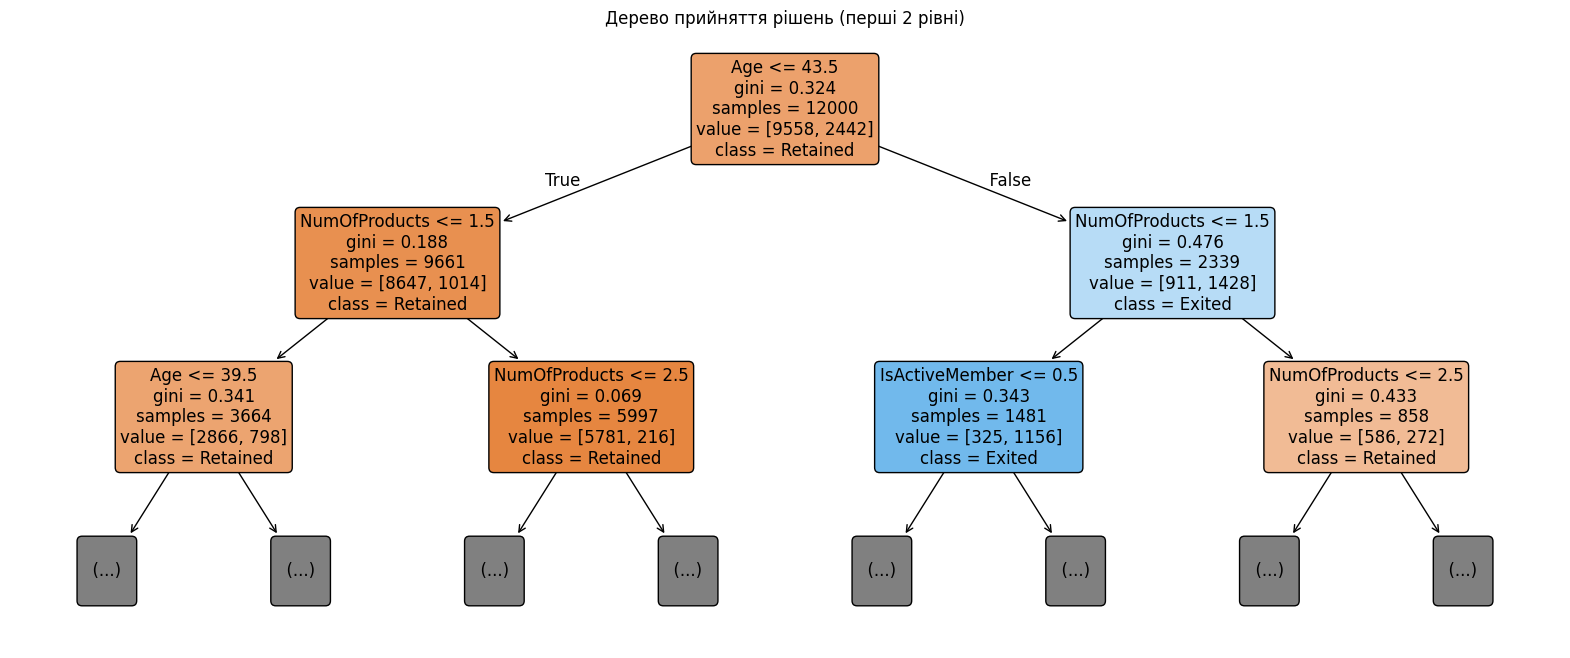


--- Топ 10 найвпливовіших ознак ---
              feature  importance
1                 Age    0.356789
4       NumOfProducts    0.168379
7     EstimatedSalary    0.123635
0         CreditScore    0.123283
3             Balance    0.079192
2              Tenure    0.052899
6      IsActiveMember    0.032688
11      Gender_Female    0.014908
9   Geography_Germany    0.014725
5           HasCrCard    0.012957


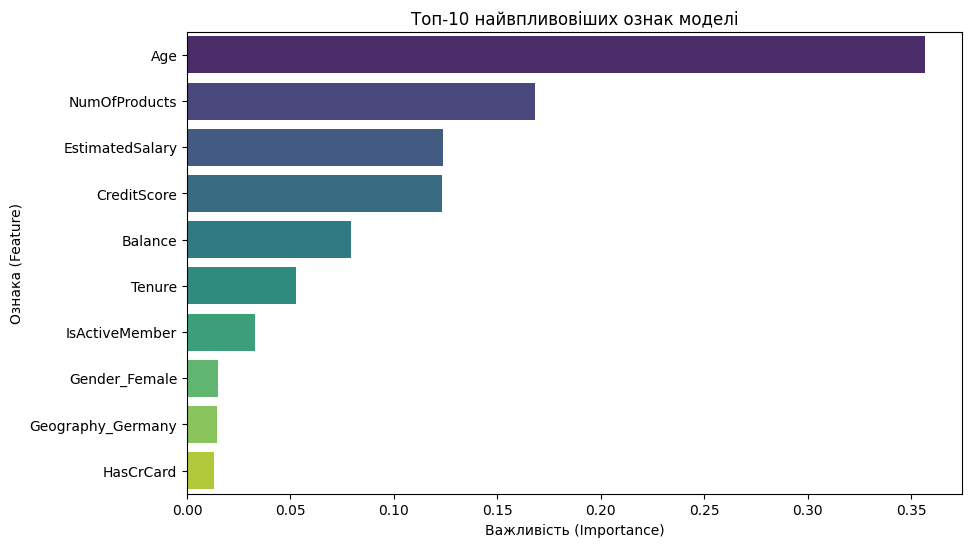

In [9]:
plt.figure(figsize=(20, 8))
plot_tree(tree_clf, max_depth=2, feature_names=input_cols,
          class_names=['Retained', 'Exited'], filled=True, rounded=True, fontsize=12)
plt.title("Дерево прийняття рішень (перші 2 рівні)")
plt.show()

importance_df = pd.DataFrame({
    'feature': input_cols,
    'importance': tree_clf.feature_importances_
}).sort_values(by='importance', ascending=False)

print("\n--- Топ 10 найвпливовіших ознак ---")
print(importance_df.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='importance', y='feature', hue='feature', legend=False, palette='viridis')
plt.title('Топ-10 найвпливовіших ознак моделі')
plt.xlabel('Важливість (Importance)')
plt.ylabel('Ознака (Feature)')
plt.show()

Модель перенавчилася (overfitting). Це видно з метрик: на тренувальних даних AUROC становить ідеальні 1.0000, тоді як на валідаційних він падає до 0.7700. Оскільки ми не обмежували параметри, дерево виросло до величезної глибини 26, запам'ятавши тренувальний набір даних напам'ять (разом із шумом), через що воно гірше генералізує на нових даних

---
Абсолютним лідером є ознака Age з показником важливості ~0.357. Другою за значущістю є NumOfProducts зі скором ~0.168. Тільки ці дві ознаки разом беруть на себе понад 50% впливу на рішення моделі. Також помітний вплив мають фінансові показники: EstimatedSalary, CreditScore та Balance.

---




**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

my_max_depth = 7
my_max_leaf_nodes = 40

tuned_tree = DecisionTreeClassifier(
    max_depth=my_max_depth,
    max_leaf_nodes=my_max_leaf_nodes,
    random_state=42
)

tuned_tree.fit(X_train, train_targets)

train_probs_tuned = tuned_tree.predict_proba(X_train)[:, 1]
val_probs_tuned = tuned_tree.predict_proba(X_val)[:, 1]

tuned_train_auc = roc_auc_score(train_targets, train_probs_tuned)
tuned_val_auc = roc_auc_score(val_targets, val_probs_tuned)

print(f"--- Результати для max_depth={my_max_depth}, max_leaf_nodes={my_max_leaf_nodes} ---")
print(f"AUROC на Train:      {tuned_train_auc:.4f}")
print(f"AUROC на Validation: {tuned_val_auc:.4f}")

--- Результати для max_depth=7, max_leaf_nodes=40 ---
AUROC на Train:      0.9298
AUROC на Validation: 0.9246


Методом експериментального підбору параметрів найкращою виявилася комбінація max_depth=7 та max_leaf_nodes=40. Вона дозволила суттєво покращити здатність моделі до генералізації: AUROC на валідаційній вибірці зріс із базових 0.7700 до 0.9246. При цьому метрика на тренувальних даних становить 0.9298. Розрив між тренуванням і валідацією є мінімальним (близько 0.005), що свідчить про успішне подолання проблеми перенавчання. "Стрижка" дерева допомогла йому ігнорувати шум і зосередитися на дійсно важливих правилах поділу клієнтів.

---



**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

Найкраща глибина (max_depth): 5
Максимальний AUROC на Validation: 0.9219


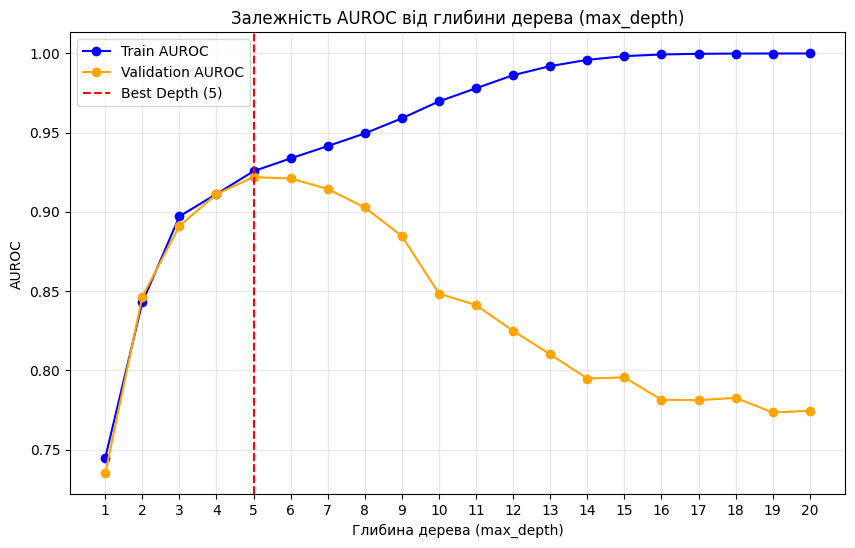

In [34]:
import numpy as np
import matplotlib.pyplot as plt

train_aucs = []
val_aucs = []
depths = range(1, 21)

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, train_targets)

    train_probs = dt.predict_proba(X_train)[:, 1]
    val_probs = dt.predict_proba(X_val)[:, 1]

    train_aucs.append(roc_auc_score(train_targets, train_probs))
    val_aucs.append(roc_auc_score(val_targets, val_probs))

best_idx = np.argmax(val_aucs)
best_depth = depths[best_idx]
best_val_auc = val_aucs[best_idx]

print(f"Найкраща глибина (max_depth): {best_depth}")
print(f"Максимальний AUROC на Validation: {best_val_auc:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(depths, train_aucs, label='Train AUROC', marker='o', color='blue')
plt.plot(depths, val_aucs, label='Validation AUROC', marker='o', color='orange')

plt.axvline(best_depth, color='red', linestyle='--', label=f'Best Depth ({best_depth})')

plt.title('Залежність AUROC від глибини дерева (max_depth)')
plt.xlabel('Глибина дерева (max_depth)')
plt.ylabel('AUROC')
plt.xticks(depths)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [39]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

final_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_tree.fit(X_train, train_targets)

test_raw_df = pd.read_csv("drive/MyDrive/Machine Learning для людей/data/bank/test.csv")

X_test_final = preprocess_new_data(
    raw_df=test_raw_df,
    input_cols=input_cols,
    encoder=encoder,
    scaler=scaler
)

test_predictions = final_tree.predict_proba(X_test_final)[:, 1]

submission_df = pd.DataFrame({
    'id': test_raw_df['id'],
    'Exited': test_predictions
})

submission_df.to_csv('submission_tree.csv', index=False)
print("Файл 'submission_tree.csv' успішно створено!")


Файл 'submission_tree.csv' успішно створено!


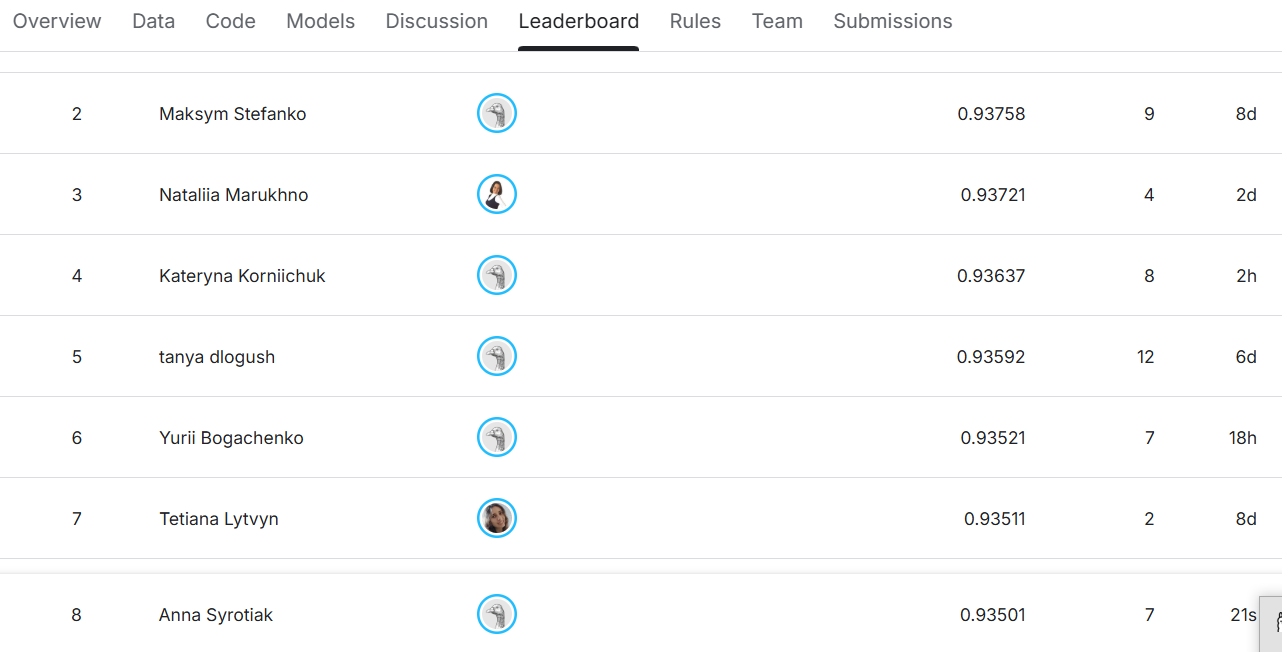